In [16]:
!pip install opendatasets

import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import opendatasets as od

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras import layers, models

In [19]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nikhitavankayalapati","key":"2a824a3ea566c8e12dc3260fde69f0a6"}'}

In [20]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [22]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/muhammad0subhan/fruit-and-vegetable-disease-healthy-vs-rotten")

Skipping, found downloaded files in "./fruit-and-vegetable-disease-healthy-vs-rotten" (use force=True to force download)


In [23]:
import os, shutil, random
from pathlib import Path
from tqdm import tqdm

# Source and target paths
source_dir = "/content/fruit-and-vegetable-disease-healthy-vs-rotten"
target_dir = "/content/dataset_real"

# Define fresh and rotten class indicators
fresh_keywords = ['fresh', 'healthy']
rotten_keywords = ['rotten', 'blight', 'mold', 'spot', 'disease']

# Create target directory structure
for split in ['train', 'validation', 'test']:
    for label in ['fresh', 'rotten']:
        os.makedirs(os.path.join(target_dir, split, label), exist_ok=True)

# Split percentages
split_ratio = {'train': 0.7, 'validation': 0.2, 'test': 0.1}

# Collect all images
all_image_paths = list(Path(source_dir).rglob("*.jpg"))
random.shuffle(all_image_paths)

# Separate based on folder name
def classify_by_name(path):
    name = path.parts[-2].lower()
    if any(k in name for k in fresh_keywords):
        return 'fresh'
    elif any(k in name for k in rotten_keywords):
        return 'rotten'
    else:
        return None

image_groups = {'fresh': [], 'rotten': []}
for img in all_image_paths:
    label = classify_by_name(img)
    if label:
        image_groups[label].append(img)

# Split and copy
def split_and_copy(img_list, label):
    n = len(img_list)
    train_end = int(n * split_ratio['train'])
    val_end = train_end + int(n * split_ratio['validation'])

    for i, img in enumerate(tqdm(img_list, desc=f'Copying {label}')):
        if i < train_end:
            split = 'train'
        elif i < val_end:
            split = 'validation'
        else:
            split = 'test'
        dest_path = os.path.join(target_dir, split, label, img.name)
        shutil.copy(str(img), dest_path)

for label in image_groups:
    split_and_copy(image_groups[label], label)

print("✅ Dataset organized at:", target_dir)


Copying rotten: 100%|██████████| 9240/9240 [00:06<00:00, 1348.85it/s]

✅ Dataset organized at: /content/dataset_real


Found 11133 images belonging to 2 classes.
Found 3390 images belonging to 2 classes.
Found 1712 images belonging to 2 classes.
Class mapping: {'fresh': 0, 'rotten': 1}
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
348/348 ━━━━━━━━━━━━━━━━━━━━ 0s 658ms/step - accuracy: 0.5595 - loss: 0.8028

348/348 ━━━━━━━━━━━━━━━━━━━━ 280s 774ms/step - accuracy: 0.5597 - loss: 0.8024 - val_accuracy: 0.8000 - val_loss: 0.4538
Epoch 2/10
348/348 ━━━━━━━━━━━━━━━━━━━━ 0s 611ms/step - accuracy: 0.7737 - loss: 0.4753

348/348 ━━━━━━━━━━━━━━━━━━━━ 242s 695ms/step - accuracy: 0.7737 - loss: 0.4753 - val_accuracy: 0.8445 - val_loss: 0.3707
Epoch 3/10
348/348 ━━━━━━━━━━━━━━━━━━━━ 0s 604ms/step - accuracy: 0.8279 - loss: 0.3946

348/348 ━━━━━━━━━━━━━━━━━━━━ 239s 687ms/step - accuracy: 0.8279 - loss: 0.3946 - val_accuracy: 0.8631 - val_loss: 0.3334
Epoch 4/10
348/348 ━━━━━━━━━━━━━━━━━━━━ 0s 600ms/step - accuracy: 0.8534 - loss: 0.3476

348/348 ━━━━━━━━━━━━━━━━━━━━ 237s 682ms/step - accuracy: 0.8534 - loss: 0.3476 - val_accuracy: 0.8735 - val_loss: 0.3098
Epoch 5/10
348/348 ━━━━━━━━━━━━━━━━━━━━ 0s 603ms/step - accuracy: 0.8561 - loss: 0.3404

348/348 ━━━━━━━━━━━━━━━━━━━━ 238s 685ms/step - accuracy: 0.8561 - loss: 0.3404 - val_accuracy: 0.8749 - val_loss: 0.2968
Epoch 6/10
348/348 ━━━━━━━━━━━━━━━━━━━━ 0s 595ms/step - accuracy: 0.8628 - loss: 0.3245

348/348 ━━━━━━━━━━━━━━━━━━━━ 236s 678ms/step - accuracy: 0.8628 - loss: 0.3244 - val_accuracy: 0.8867 - val_loss: 0.2827
Epoch 7/10
348/348 ━━━━━━━━━━━━━━━━━━━━ 0s 594ms/step - accuracy: 0.8784 - loss: 0.3023

348/348 ━━━━━━━━━━━━━━━━━━━━ 236s 678ms/step - accuracy: 0.8784 - loss: 0.3022 - val_accuracy: 0.8935 - val_loss: 0.2710
Epoch 8/10
348/348 ━━━━━━━━━━━━━━━━━━━━ 234s 673ms/step - accuracy: 0.8726 - loss: 0.3083 - val_accuracy: 0.8935 - val_loss: 0.2645
Epoch 9/10
348/348 ━━━━━━━━━━━━━━━━━━━━ 0s 603ms/step - accuracy: 0.8874 - loss: 0.2771

348/348 ━━━━━━━━━━━━━━━━━━━━ 239s 686ms/step - accuracy: 0.8873 - loss: 0.2772 - val_accuracy: 0.8979 - val_loss: 0.2584
Epoch 10/10
348/348 ━━━━━━━━━━━━━━━━━━━━ 0s 607ms/step - accuracy: 0.8821 - loss: 0.2796

348/348 ━━━━━━━━━━━━━━━━━━━━ 241s 692ms/step - accuracy: 0.8821 - loss: 0.2796 - val_accuracy: 0.9047 - val_loss: 0.2477
Epoch 1/5
348/348 ━━━━━━━━━━━━━━━━━━━━ 273s 725ms/step - accuracy: 0.8326 - loss: 0.3824 - val_accuracy: 0.8735 - val_loss: 0.3130
Epoch 2/5
348/348 ━━━━━━━━━━━━━━━━━━━━ 0s 608ms/step - accuracy: 0.9094 - loss: 0.2188

348/348 ━━━━━━━━━━━━━━━━━━━━ 240s 691ms/step - accuracy: 0.9094 - loss: 0.2188 - val_accuracy: 0.9097 - val_loss: 0.2216
Epoch 3/5
348/348 ━━━━━━━━━━━━━━━━━━━━ 0s 606ms/step - accuracy: 0.9278 - loss: 0.1804

348/348 ━━━━━━━━━━━━━━━━━━━━ 241s 691ms/step - accuracy: 0.9278 - loss: 0.1804 - val_accuracy: 0.9159 - val_loss: 0.2017
Epoch 4/5
348/348 ━━━━━━━━━━━━━━━━━━━━ 0s 605ms/step - accuracy: 0.9394 - loss: 0.1568

348/348 ━━━━━━━━━━━━━━━━━━━━ 240s 689ms/step - accuracy: 0.9394 - loss: 0.1568 - val_accuracy: 0.9378 - val_loss: 0.1536
Epoch 5/5
348/348 ━━━━━━━━━━━━━━━━━━━━ 0s 608ms/step - accuracy: 0.9529 - loss: 0.1278

348/348 ━━━━━━━━━━━━━━━━━━━━ 240s 691ms/step - accuracy: 0.9529 - loss: 0.1278 - val_accuracy: 0.9507 - val_loss: 0.1238
54/54 ━━━━━━━━━━━━━━━━━━━━ 19s 359ms/step - accuracy: 0.9807 - loss: 0.0483

✅ Test Accuracy: 0.9603
Test Loss: 0.1004


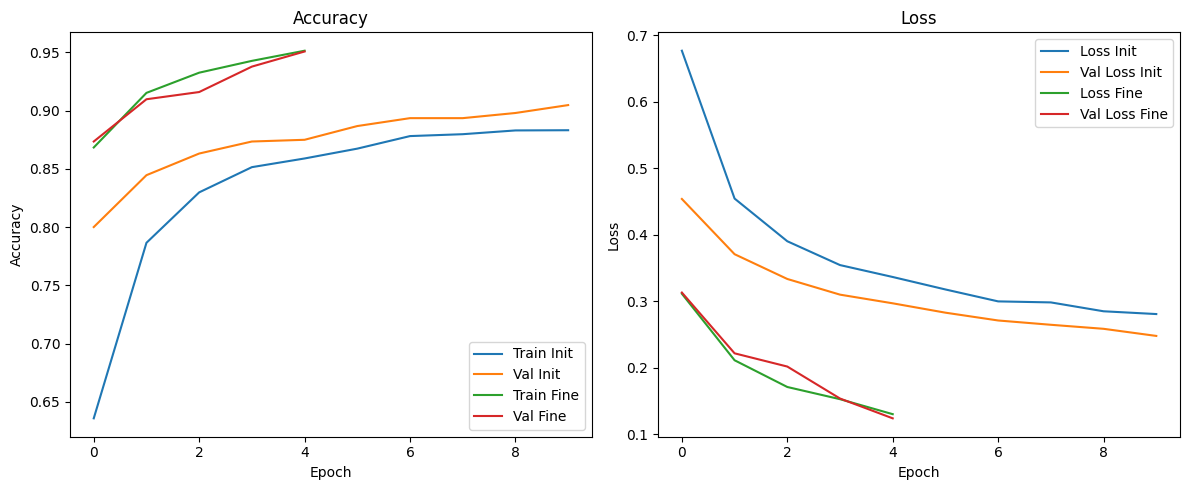

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


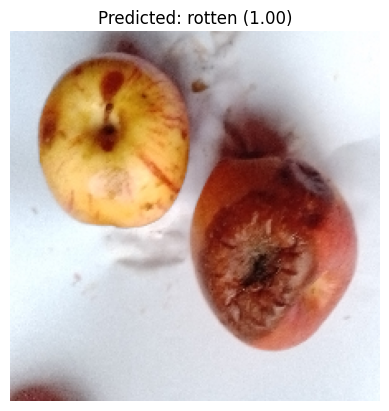

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


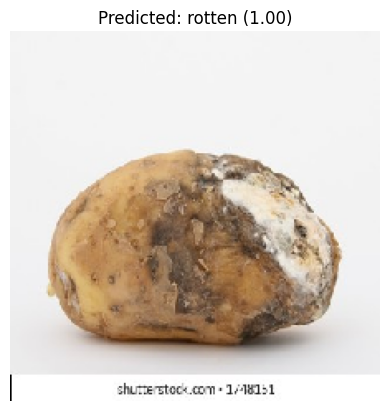

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


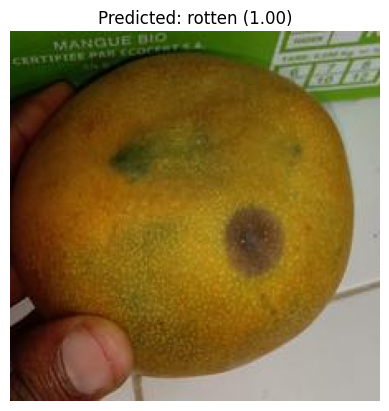

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


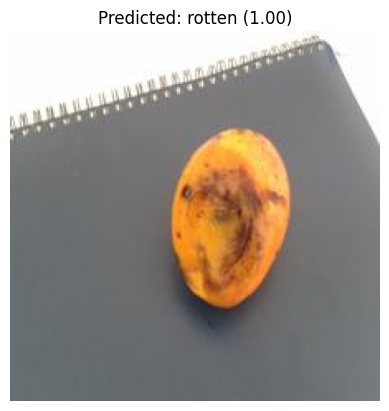

📦 Final model saved as 'fruit_freshness_mobilenetv2.h5'


In [24]:
# ✅ STEP 1: Imports & Setup
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt
import os

# Constants
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
NUM_CLASSES = 2
EPOCHS_INIT = 10
EPOCHS_FINE = 5
LR_INIT = 1e-4
LR_FINE = 1e-5

# ✅ STEP 2: Data Preparation
train_dir = '/content/dataset_real/train'
val_dir = '/content/dataset_real/validation'
test_dir = '/content/dataset_real/test'

train_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True
)
val_test_gen = ImageDataGenerator(rescale=1./255)

train_ds = train_gen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True
)
val_ds = val_test_gen.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)
test_ds = val_test_gen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

print("Class mapping:", train_ds.class_indices)

# ✅ STEP 3: Build MobileNetV2 Model
base_model = MobileNetV2(input_shape=(*IMG_SIZE, 3), include_top=False, weights='imagenet')
base_model.trainable = False  # freeze initial layers

inputs = keras.Input(shape=(*IMG_SIZE, 3))
x = base_model(inputs, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.3)(x)
outputs = layers.Dense(NUM_CLASSES, activation='softmax')(x)

model = keras.Model(inputs, outputs)

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=LR_INIT),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# ✅ STEP 4: Callbacks
callbacks = [
    EarlyStopping(patience=3, restore_best_weights=True, monitor='val_accuracy'),
    ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_accuracy')
]

# ✅ STEP 5: Initial Training (Feature Extraction)
history_init = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS_INIT,
    callbacks=callbacks
)

# ✅ STEP 6: Fine-Tuning (Unfreeze last layers)
base_model.trainable = True
for layer in base_model.layers[:-50]:
    layer.trainable = False

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=LR_FINE),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history_fine = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS_FINE,
    callbacks=callbacks
)

# ✅ STEP 7: Evaluate on Test Set
test_loss, test_acc = model.evaluate(test_ds)
print(f"\n✅ Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

# ✅ STEP 8: Plot Accuracy and Loss
def plot_history(h1, h2=None):
    plt.figure(figsize=(12, 5))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(h1.history['accuracy'], label='Train Init')
    plt.plot(h1.history['val_accuracy'], label='Val Init')
    if h2:
        plt.plot(h2.history['accuracy'], label='Train Fine')
        plt.plot(h2.history['val_accuracy'], label='Val Fine')
    plt.title('Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(h1.history['loss'], label='Loss Init')
    plt.plot(h1.history['val_loss'], label='Val Loss Init')
    if h2:
        plt.plot(h2.history['loss'], label='Loss Fine')
        plt.plot(h2.history['val_loss'], label='Val Loss Fine')
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_history(history_init, history_fine)

# ✅ STEP 9: Predict and Display Sample Images
import random
from tensorflow.keras.preprocessing import image

class_labels = list(train_ds.class_indices.keys())

def predict_sample(img_path):
    img = image.load_img(img_path, target_size=IMG_SIZE)
    arr = image.img_to_array(img) / 255.0
    arr = np.expand_dims(arr, axis=0)
    preds = model.predict(arr)[0]
    class_idx = np.argmax(preds)
    confidence = preds[class_idx]
    plt.imshow(img)
    plt.title(f"Predicted: {class_labels[class_idx]} ({confidence:.2f})")
    plt.axis('off')
    plt.show()

# Show predictions on 4 random test images
test_image_paths = [os.path.join(dp, f) for dp, dn, filenames in os.walk(test_dir) for f in filenames if f.endswith('.jpg')]
sample_images = random.sample(test_image_paths, 4)
for img_path in sample_images:
    predict_sample(img_path)

# ✅ STEP 10: Save Final Model
model.save("fruit_freshness_mobilenetv2.h5")
print("📦 Final model saved as 'fruit_freshness_mobilenetv2.h5'")
